## Wrangling Data

In the previous notebook, I scraped the data I'll need from [basketball-reference.com](https://www.basketball-reference.com/). But, of course, there are many things I need to do before putting it into a model, ranging from dealing with missing values to engineering new features. Let's get started!

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500) # Sometimes I want to see all the columns/rows.

### Basic cleaning

In [331]:
# To see how I made the raw-player-data file, see the "Scraping Data" notebook.

df = pd.read_csv('raw-player-data.csv')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,.279,NaN,NaN,NaN,2.3,8.2,.279,.279,2.7,3.8,.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NBA
1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,.372,NaN,NaN,NaN,2.1,5.6,.372,.372,1.5,2.2,.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NBA
2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,.349,NaN,NaN,NaN,2.6,7.4,.349,.349,1.3,1.9,.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NBA
3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,.256,NaN,NaN,NaN,1.5,5.7,.256,.256,1.3,2.3,.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NBA
4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,1.6,6.3,.256,NaN,NaN,NaN,1.6,6.3,.256,.256,1.3,2.4,.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950,NBA


In [332]:
# I don't need the 'Rk' column, which was just a way for basketball-reference to keep track of each row.

df2 = df.drop('Rk', axis=1)

# When I make changes, sometimes I make a new dataframe, while other times I change the original dataframe.
# Generally I make a new dataframe when the change feels significant/when potentially useful data is getting lost.

df2.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,.279,NaN,NaN,NaN,2.3,8.2,.279,.279,2.7,3.8,.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NBA
1,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,.372,NaN,NaN,NaN,2.1,5.6,.372,.372,1.5,2.2,.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NBA
2,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,.349,NaN,NaN,NaN,2.6,7.4,.349,.349,1.3,1.9,.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NBA
3,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,.256,NaN,NaN,NaN,1.5,5.7,.256,.256,1.3,2.3,.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NBA
4,Ed Bartels,F,24,DNN,13,NaN,NaN,1.6,6.3,.256,NaN,NaN,NaN,1.6,6.3,.256,.256,1.3,2.4,.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950,NBA


In [333]:
df2.dtypes

# I'll have to fix this later.

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
Lge       object
dtype: object

In [334]:
# First step: there are some rows that are just repetitions of the column titles.
# (Basketball-reference did this so people could keep track of a long table.)

drop_rows = []

for i in range(len(df2)):
    if df2.loc[i, 'Age'] == 'Age': # This'll catch all the rows that are just column title repetitions.
        drop_rows.append(i)

drop_rows

[24,
 51,
 76,
 103,
 132,
 164,
 193,
 233,
 258,
 286,
 319,
 352,
 375,
 406,
 433,
 468,
 496,
 540,
 567,
 588,
 617,
 642,
 688,
 709,
 736,
 767,
 797,
 820,
 849,
 874,
 901,
 926,
 953,
 987,
 1015,
 1039,
 1065,
 1094,
 1126,
 1153,
 1176,
 1201,
 1234,
 1263,
 1288,
 1311,
 1355,
 1378,
 1403,
 1424,
 1472,
 1499,
 1520,
 1545,
 1584,
 1613,
 1634,
 1663,
 1711,
 1734,
 1759,
 1783,
 1821,
 1849,
 1872,
 1899,
 1924,
 1960,
 1985,
 2006,
 2033,
 2058,
 2102,
 2130,
 2153,
 2180,
 2204,
 2236,
 2261,
 2286,
 2311,
 2338,
 2381,
 2406,
 2429,
 2452,
 2479,
 2513,
 2538,
 2561,
 2582,
 2605,
 2626,
 2654,
 2679,
 2706,
 2727,
 2748,
 2777,
 2802,
 2842,
 2865,
 2890,
 2913,
 2938,
 2967,
 2990,
 3019,
 3052,
 3073,
 3094,
 3121,
 3148,
 3175,
 3198,
 3227,
 3263,
 3288,
 3315,
 3342,
 3363,
 3384,
 3407,
 3430,
 3451,
 3474,
 3518,
 3543,
 3569,
 3590,
 3615,
 3638,
 3663,
 3692,
 3723,
 3752,
 3797,
 3824,
 3849,
 3876,
 3899,
 3922,
 3949,
 3972,
 3999,
 4028,
 4068,
 4089,
 

In [335]:
df2 = df2.drop(drop_rows)

df2 = df2.reset_index(drop=True) # I do this a lot because keeping the index fresh is necessary for my for-loops.

df2.tail()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
28129,Hank Williams,SF,22,UTS,39,NaN,11.6,1.8,4.2,.436,0.1,0.6,.136,1.7,3.6,.482,.445,0.5,0.6,.783,0.8,1.5,2.3,0.6,0.4,0.1,0.8,1.9,4.2,1975,ABA
28130,Milt Williams,PG,29,SSL,4,NaN,23.8,2.8,4.8,.579,0.0,0.0,NaN,2.8,4.8,.579,.579,0.0,0.0,NaN,1.0,2.3,3.3,3.0,2.5,0.0,2.5,2.5,5.5,1975,ABA
28131,John Williamson,SG,23,NYA,75,NaN,25.0,4.9,10.2,.482,0.0,0.2,.231,4.9,10.1,.486,.484,1.6,2.0,.837,0.7,1.3,2.0,2.6,0.8,0.3,2.0,2.5,11.5,1975,ABA
28132,Willie Wise,SF,27,VIR,16,NaN,35.9,8.0,18.5,.432,0.1,0.3,.250,7.9,18.3,.435,.434,4.8,6.9,.694,2.0,4.4,6.4,3.4,1.6,0.2,2.8,3.1,20.9,1975,ABA
28133,Dennis Wuycik,SF,24,SSL,25,NaN,8.8,1.4,3.0,.459,0.0,0.0,.000,1.4,2.9,.466,.459,0.4,0.8,.579,0.7,0.8,1.5,0.7,0.2,0.0,1.0,1.6,3.2,1975,ABA


In [336]:
df2.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,.279,NaN,NaN,NaN,2.3,8.2,.279,.279,2.7,3.8,.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NBA
1,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,.372,NaN,NaN,NaN,2.1,5.6,.372,.372,1.5,2.2,.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NBA
2,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,.349,NaN,NaN,NaN,2.6,7.4,.349,.349,1.3,1.9,.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NBA
3,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,.256,NaN,NaN,NaN,1.5,5.7,.256,.256,1.3,2.3,.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NBA
4,Ed Bartels,F,24,DNN,13,NaN,NaN,1.6,6.3,.256,NaN,NaN,NaN,1.6,6.3,.256,.256,1.3,2.4,.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950,NBA


In [337]:
# Now it's time to fix the dtypes issue; namely, that all the values are objects instead of integers or floats
# (except the Year column I added).
# To fix this, I first should drop all the columns that really do contain categorical values.

df3 = df2.drop(['Player', 'Pos', 'Tm', 'Lge'], axis=1)
df3.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,31,63,NaN,NaN,2.3,8.2,.279,NaN,NaN,NaN,2.3,8.2,.279,.279,2.7,3.8,.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950
1,29,49,NaN,NaN,2.1,5.6,.372,NaN,NaN,NaN,2.1,5.6,.372,.372,1.5,2.2,.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950
2,25,67,NaN,NaN,2.6,7.4,.349,NaN,NaN,NaN,2.6,7.4,.349,.349,1.3,1.9,.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950
3,24,15,NaN,NaN,1.5,5.7,.256,NaN,NaN,NaN,1.5,5.7,.256,.256,1.3,2.3,.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950
4,24,13,NaN,NaN,1.6,6.3,.256,NaN,NaN,NaN,1.6,6.3,.256,.256,1.3,2.4,.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950


In [338]:
df3 = df3.astype(float)
df3.dtypes # Success!

Age     float64
G       float64
GS      float64
MP      float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
eFG%    float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
Year    float64
dtype: object

In [339]:
# Now to combine all the columns back together. I find it easier to make a new dataframe, then use concat.

df4 = df2[['Player', 'Pos', 'Tm', 'Lge']]
df4.head()

,Player,Pos,Tm,Lge
0,Curly Armstrong,G-F,FTW,NBA
1,Cliff Barker,SG,INO,NBA
2,Leo Barnhorst,SF,CHS,NBA
3,Ed Bartels,F,TOT,NBA
4,Ed Bartels,F,DNN,NBA


In [340]:
df5 = pd.concat([df3, df4], axis=1)
df5.head() # Success!

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
0,31.0,63.0,NaN,NaN,2.3,8.2,0.279,NaN,NaN,NaN,2.3,8.2,0.279,0.279,2.7,3.8,0.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950.0,Curly Armstrong,G-F,FTW,NBA
1,29.0,49.0,NaN,NaN,2.1,5.6,0.372,NaN,NaN,NaN,2.1,5.6,0.372,0.372,1.5,2.2,0.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950.0,Cliff Barker,SG,INO,NBA
2,25.0,67.0,NaN,NaN,2.6,7.4,0.349,NaN,NaN,NaN,2.6,7.4,0.349,0.349,1.3,1.9,0.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950.0,Leo Barnhorst,SF,CHS,NBA
3,24.0,15.0,NaN,NaN,1.5,5.7,0.256,NaN,NaN,NaN,1.5,5.7,0.256,0.256,1.3,2.3,0.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950.0,Ed Bartels,F,TOT,NBA
4,24.0,13.0,NaN,NaN,1.6,6.3,0.256,NaN,NaN,NaN,1.6,6.3,0.256,0.256,1.3,2.4,0.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950.0,Ed Bartels,F,DNN,NBA


In [341]:
df5.shape

(28134, 31)

In [342]:
# Make sure I kept all the data.

assert df2.shape == df5.shape

In [343]:
# Sometimes I like to see the tail instead of the head, to get a (slightly) more comprehensive view.

df5.tail()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
28129,22.0,39.0,NaN,11.6,1.8,4.2,0.436,0.1,0.6,0.136,1.7,3.6,0.482,0.445,0.5,0.6,0.783,0.8,1.5,2.3,0.6,0.4,0.1,0.8,1.9,4.2,1975.0,Hank Williams,SF,UTS,ABA
28130,29.0,4.0,NaN,23.8,2.8,4.8,0.579,0.0,0.0,NaN,2.8,4.8,0.579,0.579,0.0,0.0,NaN,1.0,2.3,3.3,3.0,2.5,0.0,2.5,2.5,5.5,1975.0,Milt Williams,PG,SSL,ABA
28131,23.0,75.0,NaN,25.0,4.9,10.2,0.482,0.0,0.2,0.231,4.9,10.1,0.486,0.484,1.6,2.0,0.837,0.7,1.3,2.0,2.6,0.8,0.3,2.0,2.5,11.5,1975.0,John Williamson,SG,NYA,ABA
28132,27.0,16.0,NaN,35.9,8.0,18.5,0.432,0.1,0.3,0.250,7.9,18.3,0.435,0.434,4.8,6.9,0.694,2.0,4.4,6.4,3.4,1.6,0.2,2.8,3.1,20.9,1975.0,Willie Wise,SF,VIR,ABA
28133,24.0,25.0,NaN,8.8,1.4,3.0,0.459,0.0,0.0,0.000,1.4,2.9,0.466,0.459,0.4,0.8,0.579,0.7,0.8,1.5,0.7,0.2,0.0,1.0,1.6,3.2,1975.0,Dennis Wuycik,SF,SSL,ABA


In [344]:
# In general, it'll be most convenient to sort my rows by Player and Year.

df6 = df5.sort_values(by=['Player', 'Year'])
df6.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
8074,22.0,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986.0,A.C. Green,PF,LAL,NBA
8458,23.0,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987.0,A.C. Green,PF,LAL,NBA
8844,24.0,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988.0,A.C. Green,PF,LAL,NBA
9278,25.0,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989.0,A.C. Green,PF,LAL,NBA
9723,26.0,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990.0,A.C. Green,PF,LAL,NBA


In [345]:
df6.tail(10)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
17187,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
17188,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
17771,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
15907,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
16388,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA
16948,31.0,24.0,2.0,11.4,1.4,3.2,0.442,0.0,0.0,NaN,1.4,3.2,0.442,0.442,1.0,1.3,0.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004.0,Željko Rebrača,C,TOT,NBA
16949,31.0,21.0,2.0,10.6,1.0,2.6,0.407,0.0,0.0,NaN,1.0,2.6,0.407,0.407,1.0,1.3,0.786,0.9,1.4,2.3,0.2,0.2,0.4,0.6,2.1,3.1,2004.0,Željko Rebrača,C,DET,NBA
16950,31.0,3.0,0.0,17.0,4.0,7.7,0.522,0.0,0.0,NaN,4.0,7.7,0.522,0.522,0.3,0.7,0.500,1.3,1.7,3.0,0.7,0.0,0.7,1.3,2.3,8.3,2004.0,Željko Rebrača,C,ATL,NBA
17526,32.0,58.0,2.0,16.0,2.3,4.0,0.568,0.0,0.0,NaN,2.3,4.0,0.568,0.568,1.3,1.5,0.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005.0,Željko Rebrača,C,LAC,NBA
18098,33.0,29.0,2.0,14.2,1.8,3.3,0.542,0.0,0.0,NaN,1.8,3.3,0.542,0.542,1.1,1.4,0.756,0.4,1.8,2.2,0.3,0.2,0.7,0.8,2.0,4.7,2006.0,Željko Rebrača,C,LAC,NBA


As you may have noticed in the "Scraping Data" notebook, some teams are listed as "TOT."

Basically, players change teams during the same season sometime. When they do, basketball-reference logs their stats for each team separately, then give their stats for the entire season under the "TOT" tag. But while it is useful in the abstract to have that data, I don't care about it; all I want is their total for the whole season.

Thus, I have two problems to solve: drop the rows that contain their stats just for one of the teams they played for, *and* replace the 'TOT' values because I only want the "Team" values to contain actual team tags. This is both for my model (there's no inherent connection between the TOT rows), and because the 'TOT' values would cause problems later in this notebook.

In [346]:
df7 = df6.copy()

# As we will see, the best way to do what I want is to have the 'TOT' rows be after each of the
# separate team rows. The simplest way is just to change them so there's a Z at the beginning.

df7.loc[df7['Tm'] == 'TOT', 'Tm'] = 'ZTO'
df7.tail(15) # A longer tail than usual to make sure I replaced them successfully.

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
14930,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
15472,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
9881,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
16603,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
17186,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,ZTO,NBA
17187,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
17188,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
17771,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
15907,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
16388,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA


In [347]:
# Now to sort again, this time by Team as well.

df7 = df7.sort_values(by=['Player', 'Year', 'Tm'])
df7.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
8074,22.0,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986.0,A.C. Green,PF,LAL,NBA
8458,23.0,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987.0,A.C. Green,PF,LAL,NBA
8844,24.0,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988.0,A.C. Green,PF,LAL,NBA
9278,25.0,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989.0,A.C. Green,PF,LAL,NBA
9723,26.0,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990.0,A.C. Green,PF,LAL,NBA


In [348]:
df7.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
14930,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
15472,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
9881,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
16603,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
17188,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
17187,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
17186,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,ZTO,NBA
17771,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
15907,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
16388,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA


In [349]:
df7 = df7.reset_index(drop=True)
df7.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
28119,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
28120,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
28121,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
28122,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
28123,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
28124,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
28125,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,ZTO,NBA
28126,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
28127,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
28128,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA


In [350]:
# Before my for-loop, I want to make sure my code works on a single player.

Hoffman = df7[df7['Player'] == 'Paul Hoffman'].reset_index(drop=True)
Hoffman

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
0,22.0,37.0,NaN,NaN,3.8,11.0,0.348,NaN,NaN,NaN,3.8,11.0,0.348,0.348,2.8,4.2,0.662,NaN,NaN,NaN,0.6,NaN,NaN,NaN,3.3,10.5,1948.0,Paul Hoffman,G-F,BLB,BAA
1,24.0,60.0,NaN,NaN,5.2,15.2,0.341,NaN,NaN,NaN,5.2,15.2,0.341,0.341,4.0,6.1,0.665,NaN,NaN,NaN,2.7,NaN,NaN,NaN,3.9,14.4,1950.0,Paul Hoffman,G-F,BLB,NBA
2,25.0,41.0,NaN,NaN,3.1,9.7,0.318,NaN,NaN,NaN,3.1,9.7,0.318,0.318,2.6,3.8,0.673,NaN,NaN,4.9,2.7,NaN,NaN,NaN,3.3,8.8,1951.0,Paul Hoffman,G-F,BLB,NBA
3,27.0,69.0,NaN,28.3,3.5,9.5,0.366,NaN,NaN,NaN,3.5,9.5,0.366,0.366,3.2,5.0,0.655,NaN,NaN,4.6,3.4,NaN,NaN,NaN,4.1,10.2,1953.0,Paul Hoffman,SG,BLB,NBA
4,28.0,72.0,NaN,34.8,3.5,10.6,0.332,NaN,NaN,NaN,3.5,10.6,0.332,0.332,3.0,4.2,0.716,NaN,NaN,6.8,4.0,NaN,NaN,NaN,3.8,10.0,1954.0,Paul Hoffman,PG,BLB,NBA
5,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,BLB,NBA
6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,NYK,NBA
7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,SG,PHW,NBA
8,29.0,38.0,NaN,17.6,1.7,5.7,0.301,NaN,NaN,NaN,1.7,5.7,0.301,0.301,1.7,2.4,0.688,NaN,NaN,3.3,2.5,NaN,NaN,NaN,2.4,5.1,1955.0,Paul Hoffman,G-F,ZTO,NBA


What I need to do is (a) find the rows that contain 'ZTO' and (b) drop the rows that contain the same player and the same year. Because of my sorting, I know all those rows will be above 'ZTO.'

How should I rename the ZTO column? I could just take the team name directly above it. But I think it would be best practice to replace it with the team the player played the *most* games for that year.

In [351]:
drop_rows = []
for i in range(len(Hoffman)):
    teams = []
    if Hoffman.loc[i, 'Tm'] == 'ZTO':
        for j in np.arange(i-5, i, 1):
            # To save time, I really want to limit the range of this second for-loop.
            # Players basically never move teams 5 teams a season, so this should be fine.
            if (Hoffman.loc[i, 'Player'] == Hoffman.loc[j, 'Player']) & (Hoffman.loc[i, 'Year'] == Hoffman.loc[j, 'Year']):
                drop_rows.append(j)
                teams.append(j)
        df_teams = Hoffman.loc[teams] # This takes all the rows that are getting dropped.
        max_games = df_teams.max(skipna=True)[1]
        # The .max function finds the max values of each row and puts them in a series.
        # Because games played is the second column, I can pull that value out with the "[1]."
        # The "skipna" is necessary becauase there are a lot of NaN values in my dataset.
        if max_games == None:
            max_team = df_teams.loc[teams[-1], 'Tm']
            # Sometimes there are only NaN values, so .max returns 'None.' In that case, I just take
            # the team from right before ZTO.
        else:
            for team in teams:
                if Hoffman.loc[team, 'G'] == max_games:
                    max_team = df7.loc[team, 'Tm']
        Hoffman.loc[i, 'Tm'] = max_team # This changes ZTO to the team the player played the most games with that season.
        
Hoffman # Success!

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
0,22.0,37.0,NaN,NaN,3.8,11.0,0.348,NaN,NaN,NaN,3.8,11.0,0.348,0.348,2.8,4.2,0.662,NaN,NaN,NaN,0.6,NaN,NaN,NaN,3.3,10.5,1948.0,Paul Hoffman,G-F,BLB,BAA
1,24.0,60.0,NaN,NaN,5.2,15.2,0.341,NaN,NaN,NaN,5.2,15.2,0.341,0.341,4.0,6.1,0.665,NaN,NaN,NaN,2.7,NaN,NaN,NaN,3.9,14.4,1950.0,Paul Hoffman,G-F,BLB,NBA
2,25.0,41.0,NaN,NaN,3.1,9.7,0.318,NaN,NaN,NaN,3.1,9.7,0.318,0.318,2.6,3.8,0.673,NaN,NaN,4.9,2.7,NaN,NaN,NaN,3.3,8.8,1951.0,Paul Hoffman,G-F,BLB,NBA
3,27.0,69.0,NaN,28.3,3.5,9.5,0.366,NaN,NaN,NaN,3.5,9.5,0.366,0.366,3.2,5.0,0.655,NaN,NaN,4.6,3.4,NaN,NaN,NaN,4.1,10.2,1953.0,Paul Hoffman,SG,BLB,NBA
4,28.0,72.0,NaN,34.8,3.5,10.6,0.332,NaN,NaN,NaN,3.5,10.6,0.332,0.332,3.0,4.2,0.716,NaN,NaN,6.8,4.0,NaN,NaN,NaN,3.8,10.0,1954.0,Paul Hoffman,PG,BLB,NBA
5,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,BLB,NBA
6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,NYK,NBA
7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,SG,PHW,NBA
8,29.0,38.0,NaN,17.6,1.7,5.7,0.301,NaN,NaN,NaN,1.7,5.7,0.301,0.301,1.7,2.4,0.688,NaN,NaN,3.3,2.5,NaN,NaN,NaN,2.4,5.1,1955.0,Paul Hoffman,G-F,PHW,NBA


In [352]:
drop_rows = []
for i in range(len(df7)):
    teams = []
    if df7.loc[i, 'Tm'] == 'ZTO':
        for j in np.arange(i-10, i, 1):
            if (df7.loc[i, 'Player'] == df7.loc[j, 'Player']) & (df7.loc[i, 'Year'] == df7.loc[j, 'Year']):
                drop_rows.append(j)
                teams.append(j)
        df_teams = df7.loc[teams]
        max_games = df_teams.max(skipna=True)[1]
        if max_games == None:
            max_team = df_teams.loc[teams[-1], 'Tm']
        for team in teams:
            if df7.loc[team, 'G'] == max_games:
                max_team = df7.loc[team, 'Tm']
        df7.loc[i, 'Tm'] = max_team
        
df8 = df7.drop(drop_rows)

df8.tail(15) # Success!

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
28113,24.0,37.0,0.0,4.9,0.6,1.4,0.453,0.0,0.0,0.000,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1.0,2.0,1995.0,Žan Tabak,C,HOU,NBA
28114,25.0,67.0,18.0,19.9,3.4,6.2,0.543,0.0,0.0,0.000,3.4,6.2,0.545,0.543,1.0,1.7,0.561,1.7,3.0,4.8,0.9,0.4,0.5,1.5,3.0,7.7,1996.0,Žan Tabak,C,TOR,NBA
28115,26.0,13.0,4.0,16.8,2.5,5.5,0.451,0.0,0.0,NaN,2.5,5.5,0.451,0.451,1.5,2.2,0.690,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997.0,Žan Tabak,C,TOR,NBA
28118,27.0,57.0,34.0,17.3,2.5,5.3,0.467,0.0,0.0,0.000,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998.0,Žan Tabak,C,TOR,NBA
28119,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
28120,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
28121,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
28122,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
28125,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,GSW,NBA
28126,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA


In [353]:
df8 = df8.reset_index(drop=True)
df8.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
22939,24.0,37.0,0.0,4.9,0.6,1.4,0.453,0.0,0.0,0.000,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1.0,2.0,1995.0,Žan Tabak,C,HOU,NBA
22940,25.0,67.0,18.0,19.9,3.4,6.2,0.543,0.0,0.0,0.000,3.4,6.2,0.545,0.543,1.0,1.7,0.561,1.7,3.0,4.8,0.9,0.4,0.5,1.5,3.0,7.7,1996.0,Žan Tabak,C,TOR,NBA
22941,26.0,13.0,4.0,16.8,2.5,5.5,0.451,0.0,0.0,NaN,2.5,5.5,0.451,0.451,1.5,2.2,0.690,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997.0,Žan Tabak,C,TOR,NBA
22942,27.0,57.0,34.0,17.3,2.5,5.3,0.467,0.0,0.0,0.000,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998.0,Žan Tabak,C,TOR,NBA
22943,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
22944,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
22945,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
22946,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
22947,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,GSW,NBA
22948,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA


The next step is to find my Target values--i.e., the numbers I'm trying to predict.

In this project, I'm trying to predict each player's Assist total in the *following* season. Hence, my Target values for each player/year combo is that player's AST number in the next year.

In [354]:
# First, let's check to see if I'm missing any assist values.

df8['AST'].isnull().sum() # Nope!

0

In [355]:
# I can't just shift the assist values because I need to make sure the player and year line up correctly.
# I'll just do another for-loop.

targets = []

for i in range(len(df8)):
    if i == len(df8)-1:
        targets.append(np.nan) # Need to do this or else the for-loop breaks at the very end.
    elif df8.loc[i, 'Player'] != df8.loc[i+1, 'Player']:
        targets.append(np.nan)
        # The above if-clause applies to each player's final season in the league (and also to all 2019 rows).
        # Of course, for each player's final season, there are no "next season's Assist" numbers I can use
        # to train my models on.
    else:
        targets.append(df8.loc[i+1, 'AST'])
        # Re-ordering the dataframe by player and year makes this a lot simpler.

df8['Target'] = targets

df8.tail(10)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge,Target
22944,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA,NaN
22945,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA,NaN
22946,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA,0.6
22947,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,GSW,NBA,0.3
22948,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA,NaN
22949,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA,0.3
22950,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA,0.3
22951,31.0,24.0,2.0,11.4,1.4,3.2,0.442,0.0,0.0,NaN,1.4,3.2,0.442,0.442,1.0,1.3,0.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004.0,Željko Rebrača,C,DET,NBA,0.4
22952,32.0,58.0,2.0,16.0,2.3,4.0,0.568,0.0,0.0,NaN,2.3,4.0,0.568,0.568,1.3,1.5,0.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005.0,Željko Rebrača,C,LAC,NBA,0.3
22953,33.0,29.0,2.0,14.2,1.8,3.3,0.542,0.0,0.0,NaN,1.8,3.3,0.542,0.542,1.1,1.4,0.756,0.4,1.8,2.2,0.3,0.2,0.7,0.8,2.0,4.7,2006.0,Željko Rebrača,C,LAC,NBA,NaN


In [356]:
# I want to reorder the columns for my own convenience.

df9 = df8[['Player', 'Year', 'Lge', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
            'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
            'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST', 'Target']]

df9.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9


In [357]:
# My numbers are getting awfully high, so let's just go back to "df."

df = df9.copy()
df.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9


In [358]:
# One last thing to do before moving on to my features.
# Certain players have an asterisk after their name. For example:

kareem = df[df['Player'] == 'Kareem Abdul-Jabbar*']
kareem.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
12606,Kareem Abdul-Jabbar*,1970.0,NBA,C,22.0,MIL,82.0,NaN,43.1,11.4,22.1,0.518,NaN,NaN,NaN,11.4,22.1,0.518,0.518,5.9,9.1,0.653,NaN,NaN,14.5,NaN,NaN,NaN,3.5,28.8,4.1,3.3
12607,Kareem Abdul-Jabbar*,1971.0,NBA,C,23.0,MIL,82.0,NaN,40.1,13.0,22.5,0.577,NaN,NaN,NaN,13.0,22.5,0.577,0.577,5.7,8.3,0.690,NaN,NaN,16.0,NaN,NaN,NaN,3.2,31.7,3.3,4.6
12608,Kareem Abdul-Jabbar*,1972.0,NBA,C,24.0,MIL,81.0,NaN,44.2,14.3,24.9,0.574,NaN,NaN,NaN,14.3,24.9,0.574,0.574,6.2,9.0,0.689,NaN,NaN,16.6,NaN,NaN,NaN,2.9,34.8,4.6,5.0
12609,Kareem Abdul-Jabbar*,1973.0,NBA,C,25.0,MIL,76.0,NaN,42.8,12.9,23.3,0.554,NaN,NaN,NaN,12.9,23.3,0.554,0.554,4.3,6.1,0.713,NaN,NaN,16.1,NaN,NaN,NaN,2.7,30.2,5.0,4.8
12610,Kareem Abdul-Jabbar*,1974.0,NBA,C,26.0,MIL,81.0,NaN,43.8,11.7,21.7,0.539,NaN,NaN,NaN,11.7,21.7,0.539,0.539,3.6,5.2,0.702,3.5,11.0,14.5,1.4,3.5,NaN,2.9,27.0,4.8,4.1


In [359]:
# I want to get rid of these asterisks. First, let's practice on a single example so I get the syntax right.

'*' in df.loc[12610, 'Player']

True

In [360]:
a = df.loc[12610, 'Player'].split('*')
a[0]
# There we go!

'Kareem Abdul-Jabbar'

In [361]:
player_new = []

for i in range(len(df)):
    if ('*' in df.loc[i, 'Player']) == True:
        a = df.loc[i, 'Player'].split('*')
        player_new.append(a[0])
    else:
        player_new.append(df.loc[i, 'Player'])
        
df['Player'] = player_new

kareem = df[df['Player'] == 'Kareem Abdul-Jabbar']
kareem.head()
# Success!

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
12606,Kareem Abdul-Jabbar,1970.0,NBA,C,22.0,MIL,82.0,NaN,43.1,11.4,22.1,0.518,NaN,NaN,NaN,11.4,22.1,0.518,0.518,5.9,9.1,0.653,NaN,NaN,14.5,NaN,NaN,NaN,3.5,28.8,4.1,3.3
12607,Kareem Abdul-Jabbar,1971.0,NBA,C,23.0,MIL,82.0,NaN,40.1,13.0,22.5,0.577,NaN,NaN,NaN,13.0,22.5,0.577,0.577,5.7,8.3,0.690,NaN,NaN,16.0,NaN,NaN,NaN,3.2,31.7,3.3,4.6
12608,Kareem Abdul-Jabbar,1972.0,NBA,C,24.0,MIL,81.0,NaN,44.2,14.3,24.9,0.574,NaN,NaN,NaN,14.3,24.9,0.574,0.574,6.2,9.0,0.689,NaN,NaN,16.6,NaN,NaN,NaN,2.9,34.8,4.6,5.0
12609,Kareem Abdul-Jabbar,1973.0,NBA,C,25.0,MIL,76.0,NaN,42.8,12.9,23.3,0.554,NaN,NaN,NaN,12.9,23.3,0.554,0.554,4.3,6.1,0.713,NaN,NaN,16.1,NaN,NaN,NaN,2.7,30.2,5.0,4.8
12610,Kareem Abdul-Jabbar,1974.0,NBA,C,26.0,MIL,81.0,NaN,43.8,11.7,21.7,0.539,NaN,NaN,NaN,11.7,21.7,0.539,0.539,3.6,5.2,0.702,3.5,11.0,14.5,1.4,3.5,NaN,2.9,27.0,4.8,4.1


### Encoding categorical columns

Most of my categorical columns don't have a natural order, so I'll use either One Hot Encoding or Ordinal Encoding depending on the model (One Hot for linear models, Ordinal for random forests/xgboost).

There is one exception, though. In basketball, the positions have a natural order; indeed, they're often colloquially referred to by number: 1 for point guard, 2 for shooting guard, 3 for small forward, 4 for power forward, and 5 for center. So I should encode that myself.

In [362]:
df['Pos'].value_counts()

SG       4510
PF       4486
C        4431
SF       4337
PG       4128
G         244
F         218
G-F       121
F-C        89
F-G        77
C-F        59
PG-SG      37
C-PF       35
SF-SG      35
SG-PG      32
PF-C       30
SG-SF      30
PF-SF      28
SF-PF      20
SG-PF       4
SF-PG       1
C-SF        1
PG-SF       1
Name: Pos, dtype: int64

As we can see, there are some "hybrid" positions in the data, e.g. "PG-SG" (point guard/shooting guard). For these, I'll just take the average of both position numbers.

The data also occasionally just uses the generic 'G' ("guard") or 'F' ("forward"). I'll assume a "guard" is a PG/SG, and a "forward" is a SF/PF.

In [363]:
pos_encode = {'Pos': {
    'PF': 4, 'C': 5, 'SG': 2, 'SF': 3, 'PG': 1,
    'G': 1.5, 'G-F': 2.5, 'F': 3.5, 'F-C': 4.25, 'F-G': 2.5,
    'C-F': 4.25, 'C-PF': 4.5, 'PG-SG': 1.5, 'SF-SG': 2.5, 'SG-SF': 2.5,
    'PF-C': 4.5, 'PF-SF': 3.5, 'SG-PG': 1.5, 'SF-PF': 3.5, 'SG-PF': 3,
    'PG-SF': 2, 'C-SF': 4, 'SF-PG': 2
}}

df = df.replace(to_replace=pos_encode)

df['Pos'].value_counts() # Success!

2.00    4512
4.00    4487
5.00    4431
3.00    4341
1.00    4128
1.50     313
3.50     266
2.50     263
4.25     148
4.50      65
Name: Pos, dtype: int64

### Dealing with NaNs

In [364]:
# I have a lot of NaN values, so let's take care of those. (Except for Target--that'll have to wait,
# for reasons that will become clear later.)

# First things first--the 3-pointer only existed in the NBA after 1980, which is why all the three-point related
# columns before that data are filled with NaNs.
# While it's not entirely fair to those early players, since they did sometimes make shots that would be 3-pointers
# under the current rules, I think it's most straightforward to just set them all to 0.
# After all, the total number of 3-pointers attempted and made during those years was zero.

for i in range(len(df)):
    if df.loc[i, 'Lge'] == 'ABA':
        continue # The ABA had 3s from the beginning; it was one of the ways they differentiated themselves from the NBA.
    elif df.loc[i, 'Year'] >= 1980:
        continue
    else:
        df.loc[i, '3P'] = 0
        df.loc[i, '3PA'] = 0
        df.loc[i, '3P%'] = 0
        
df.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age         29
Tm           0
G            0
GS        6911
MP         793
FG           0
FGA          0
FG%         72
3P           0
3PA          0
3P%       2856
2P           0
2PA          0
2P%        103
eFG%        72
FT           0
FTA          0
FT%        619
ORB       3788
DRB       3788
TRB        657
STL       4521
BLK       4520
TOV       4635
PF           0
PTS          0
AST          0
Target    4625
dtype: int64

The null values for the percentage columns have a simple explanation. Each percentage value is derived from dividing shots made by shots attempted. But of course, you can't divide by zero ([normally](https://en.wikipedia.org/wiki/Division_by_zero#Projectively_extended_real_line)), so in those cases basketball-reference just gives us NaN.

Since the player made no shot attempts, I think it's fair to set these percentage NaNs to zero.

In [365]:
df2 = df.fillna(value={'FG%': 0, '3P%': 0, '2P%': 0, 'eFG%': 0, 'FT%': 0})
df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age         29
Tm           0
G            0
GS        6911
MP         793
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB       3788
DRB       3788
TRB        657
STL       4521
BLK       4520
TOV       4635
PF           0
PTS          0
AST          0
Target    4625
dtype: int64

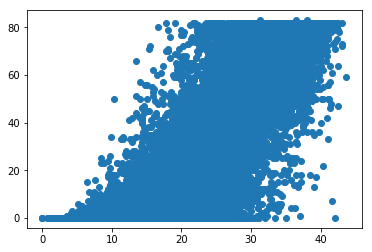

In [366]:
# Next is "games started." I have an idea for this one. Let's do an exploratory visualization first.
# However, I'm going to exclude the 2019 data from the model.
# The reason is that that's going to be my test set, so I want to avoid having it bias the rest of my data
# as much as possible.

train = df2[df2['Year'] < 2019]

A = train.dropna(subset=['GS', 'MP'])

plt.scatter(A['MP'], A['GS']);

As I thought, there's a roughly positive correlation between minutes played and games started.

I think that, of all the columns that still have NaNs, games started is the one that can best be estimated by reference to other values. So let's use a model to impute them.

In [367]:
A = A.drop(['Player', 'Tm', 'Target'], axis=1) # Dropping the categorical variables with high cardinality,
# and the Target column since I would leak data from the future if I included it.

X_train = A.drop('GS', axis=1)
y_train = A['GS']

In [368]:
# I'll use a random forest with cross-validation for this one.

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=100)
)

param_distributions={
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__max_features': uniform(0, 1),
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  2.8min remaining:   22.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


In [369]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.5629282312731411, 'randomforestregressor__n_estimators': 403, 'simpleimputer__strategy': 'median'}
Cross-validation accuracy 133.85828516903774


In [370]:
from sklearn.metrics import mean_squared_error

# I think it makes the most sense for the baseline to be the average of the entire GS column.

baseline = [np.mean(A['GS'])] * len(y_train)
baseline_mse = mean_squared_error(baseline, y_train)

print('Baseline mean squared error:', baseline_mse)
print('The model beats the baseline by:', baseline_mse - (-search.best_score_))

# My model is significantly better than the baseline:

Baseline mean squared error: 891.3617267678699
The model beats the baseline by: 757.5034415988321


In [371]:
# Now to predict the GS values for all the rows that lack them.

B = train[pd.isna(train['GS']) == True]
B.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
30,A.W. Holt,1971.0,NBA,3.0,24.0,CHI,6.0,NaN,2.3,0.2,1.3,0.125,0.0,0.0,0.0,0.2,1.3,0.125,0.125,0.3,0.5,0.667,NaN,NaN,0.7,NaN,NaN,NaN,0.2,0.7,0.0,NaN
58,Aaron James,1975.0,NBA,3.0,22.0,NOJ,76.0,NaN,22.8,4.9,10.2,0.477,0.0,0.0,0.0,4.9,10.2,0.477,0.477,1.9,2.5,0.778,1.8,3.0,4.8,0.5,0.2,NaN,2.9,11.7,0.9,0.8
59,Aaron James,1976.0,NBA,3.0,23.0,NOJ,75.0,NaN,17.9,3.5,7.9,0.441,0.0,0.0,0.0,3.5,7.9,0.441,0.441,2.0,2.7,0.750,1.2,2.1,3.3,0.4,0.1,NaN,2.3,9.0,0.8,1.1
60,Aaron James,1977.0,NBA,3.0,24.0,NOJ,52.0,NaN,20.4,4.6,9.3,0.490,0.0,0.0,0.0,4.6,9.3,0.490,0.490,1.7,2.2,0.781,1.1,2.5,3.6,0.4,0.1,NaN,2.4,10.9,1.1,1.4
61,Aaron James,1978.0,NBA,3.0,25.0,NOJ,80.0,NaN,26.5,5.4,10.8,0.497,0.0,0.0,0.0,5.4,10.8,0.497,0.497,1.5,2.0,0.745,2.0,3.2,5.3,0.5,0.3,1.6,3.2,12.2,1.4,1.1


In [372]:
# I want to copy the best params directly into my follow-up model.

type(search.best_params_)

dict

In [373]:
list(search.best_params_.values()) # Make it a list so I can call each value separately.

[10, 0.5629282312731411, 403, 'median']

In [374]:
param_values = list(search.best_params_.values())

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy=param_values[3]),
    RandomForestRegressor(max_depth=param_values[0], max_features=param_values[1],
                          n_estimators=param_values[2], random_state=50)
)

pipeline.fit(X_train, y_train)

X_pred = B.drop(['Player', 'Tm', 'Target', 'GS'], axis=1)

y_pred = np.around(pipeline.predict(X_pred))
# Obviously they can't start a fraction of a game, so I need to round to the nearest whole number.

B['GS'] = y_pred

B.head()

C:\Anaconda3\envs\unit2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
30,A.W. Holt,1971.0,NBA,3.0,24.0,CHI,6.0,0.0,2.3,0.2,1.3,0.125,0.0,0.0,0.0,0.2,1.3,0.125,0.125,0.3,0.5,0.667,NaN,NaN,0.7,NaN,NaN,NaN,0.2,0.7,0.0,NaN
58,Aaron James,1975.0,NBA,3.0,22.0,NOJ,76.0,27.0,22.8,4.9,10.2,0.477,0.0,0.0,0.0,4.9,10.2,0.477,0.477,1.9,2.5,0.778,1.8,3.0,4.8,0.5,0.2,NaN,2.9,11.7,0.9,0.8
59,Aaron James,1976.0,NBA,3.0,23.0,NOJ,75.0,11.0,17.9,3.5,7.9,0.441,0.0,0.0,0.0,3.5,7.9,0.441,0.441,2.0,2.7,0.750,1.2,2.1,3.3,0.4,0.1,NaN,2.3,9.0,0.8,1.1
60,Aaron James,1977.0,NBA,3.0,24.0,NOJ,52.0,13.0,20.4,4.6,9.3,0.490,0.0,0.0,0.0,4.6,9.3,0.490,0.490,1.7,2.2,0.781,1.1,2.5,3.6,0.4,0.1,NaN,2.4,10.9,1.1,1.4
61,Aaron James,1978.0,NBA,3.0,25.0,NOJ,80.0,46.0,26.5,5.4,10.8,0.497,0.0,0.0,0.0,5.4,10.8,0.497,0.497,1.5,2.0,0.745,2.0,3.2,5.3,0.5,0.3,1.6,3.2,12.2,1.4,1.1


In [375]:
new_gs = []

for i in range(len(df2)):
    if (i in B.index) == False: # Easiest way to make sure I keep all the GS data that already exists.
        new_gs.append(df2.loc[i, 'GS'])
    else:
        new_gs.append(B.loc[i, 'GS'])
        
assert new_gs[0] == df2.loc[0, 'GS']

In [376]:
assert new_gs[30] == B.loc[30, 'GS']

In [377]:
df2['GS'] = new_gs

df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age         29
Tm           0
G            0
GS           0
MP         793
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB       3788
DRB       3788
TRB        657
STL       4521
BLK       4520
TOV       4635
PF           0
PTS          0
AST          0
Target    4625
dtype: int64

In [378]:
# The rest of the NaN columns, I'll just use a scipy imputer for. (Except for Target, but that comes later.)

imputer = SimpleImputer(strategy='median')
# Using median makes sense to me because the mean might get skewed by outliers.

df3 = df2.drop(['Target', 'Player', 'Lge', 'Tm'], axis=1)
# Dropping "Target" because I want to keep those NaNs. Dropping the others because they're categorical columns.
# (They don't have NaNs anyway.)

df4 = pd.DataFrame(imputer.fit_transform(df3), columns=df3.columns)
# The imputer returns an array, but I want it in a dataframe.

df4 = pd.concat([df2[['Target', 'Player', 'Lge', 'Tm']], df4], axis=1)
# Putting the columns I dropped back in.

df4 = df4[[c for c in df.columns if c != 'Target'] + ['Target']] # I'd prefer to have Target be at the very end.

df4.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
AST          0
Target    4625
dtype: int64

In [379]:
assert df4.shape == df2.shape

### Engineering Features

The first two features I want to engineer are relatively straightforward.

First, for each year, I want the average of their assist rates for *all* their previous years.

Second, I want to log the number of seasons they've been in the league--1 for their rookie year, 2 for their sophmore year, etc.

In [380]:
CAS = [] # Stands for "career assists."

for i in range(len(df4)):
    career_assists = []
    for j in range(25): # Nobody has more than 25 seasons in the league. Note that I'm keeping the nested for-loop small.
        if i-j < 0:
            continue # Important so the for-loop doesn't break in the early rows.
        elif df4.loc[i, 'Player'] != df4.loc[i-j, 'Player']:
            continue
        else:
            career_assists.append(df4.loc[i-j, 'AST']) # This is another case where the sorting is very helpful.
    CAS.append(np.mean(career_assists))
    
Season = []

for i in range(len(df4)):
    if i==0:
        Season.append(1)
    elif df4.loc[i, 'Player'] == df4.loc[i-1, 'Player']:
        Season.append(Season[i-1] + 1)
    else:
        Season.append(1) # Yet another case where the sorting is helpful.
        
df4['CAS'] = CAS
df4['Szn'] = Season

df4.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5


In [381]:
# There's one last feature I want to engineer with this data--actually, a whole bunch of them.
# The Assist rate that I'm predicting is per-game. Obviously, the more minutes a player plays,
# the more assists they'll get. So I think it would be helpful to create a new stat, where I multiply
# each of the previous ones by minutes played. I'll put a '_adj' after the stat to note this,
# where 'adj' stands for "adjusted (by minutes played)."

stats = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
         'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST', 'CAS']

for stat in stats:
    df4[f'{stat}_adj'] = df4[stat] * df4['MP']
    
df4.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.90,16.1370,16.0380,112.20,148.50,24.7830,105.60,181.50,287.10,26.40,19.80,46.20,82.50,425.70,36.30,34.98


In [382]:
df4.isnull().sum()

Player         0
Year           0
Lge            0
Pos            0
Age            0
Tm             0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
AST            0
Target      4625
CAS            0
Szn            0
FG_adj         0
FGA_adj        0
FG%_adj        0
3P_adj         0
3PA_adj        0
3P%_adj        0
2P_adj         0
2PA_adj        0
2P%_adj        0
eFG%_adj       0
FT_adj         0
FTA_adj        0
FT%_adj        0
ORB_adj        0
DRB_adj        0
TRB_adj        0
STL_adj        0
BLK_adj        0
TOV_adj        0
PF_adj         0
PTS_adj        0
AST_adj        0
CAS_adj        0
dtype: int64

### Bringing in team data

In [383]:
# Now it's time to use my team data.

df5 = pd.read_csv('raw-team-data.csv')
            
df5.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,NYK 1957,NYK 1958,NYK 1959,NYK 1960,NYK 1961,NYK 1962,NYK 1963,NYK 1964,NYK 1965,NYK 1966,NYK 1967,NYK 1968,NYK 1969,NYK 1970,NYK 1971,NYK 1972,NYK 1973,NYK 1974,NYK 1975,NYK 1976,NYK 1977,NYK 1978,NYK 1979,NYK 1980,NYK 1981,NYK 1982,NYK 1983,NYK 1984,NYK 1985,NYK 1986,NYK 1987,NYK 1988,NYK 1989,NYK 1990,NYK 1991,NYK 1992,NYK 1993,NYK 1994,NYK 1995,NYK 1996,NYK 1997,NYK 1998,NYK 1999,NYK 2000,NYK 2001,NYK 2002,NYK 2003,NYK 2004,NYK 2005,NYK 2006,NYK 2007,NYK 2008,NYK 2009,NYK 2010,NYK 2011,NYK 2012,NYK 2013,NYK 2014,NYK 2015,NYK 2016,NYK 2017,NYK 2018,NYK 2019,BOS 1947,BOS 1948,BOS 1949,BOS 1950,BOS 1951,BOS 1952,BOS 1953,BOS 1954,BOS 1955,BOS 1956,BOS 1957,BOS 1958,BOS 1959,BOS 1960,BOS 1961,BOS 1962,BOS 1963,BOS 1964,BOS 1965,BOS 1966,BOS 1967,BOS 1968,BOS 1969,BOS 1970,BOS 1971,BOS 1972,BOS 1973,BOS 1974,BOS 1975,BOS 1976,BOS 1977,BOS 1978,BOS 1979,BOS 1980,BOS 1981,BOS 1982,BOS 1983,BOS 1984,BOS 1985,BOS 1986,BOS 1987,BOS 1988,BOS 1989,BOS 1990,BOS 1991,BOS 1992,BOS 1993,BOS 1994,BOS 1995,BOS 1996,BOS 1997,BOS 1998,BOS 1999,BOS 2000,BOS 2001,BOS 2002,BOS 2003,BOS 2004,BOS 2005,BOS 2006,BOS 2007,BOS 2008,BOS 2009,BOS 2010,BOS 2011,BOS 2012,BOS 2013,BOS 2014,BOS 2015,BOS 2016,BOS 2017,BOS 2018,BOS 2019,DET 1958,DET 1959,DET 1960,DET 1961,DET 1962,DET 1963,DET 1964,DET 1965,DET 1966,DET 1967,DET 1968,DET 1969,DET 1970,DET 1971,DET 1972,DET 1973,DET 1974,DET 1975,DET 1976,DET 1977,DET 1978,DET 1979,DET 1980,DET 1981,DET 1982,DET 1983,DET 1984,DET 1985,DET 1986,DET 1987,DET 1988,DET 1989,DET 1990,DET 1991,DET 1992,DET 1993,DET 1994,DET 1995,DET 1996,DET 1997,DET 1998,DET 1999,DET 2000,DET 2001,DET 2002,DET 2003,DET 2004,DET 2005,DET 2006,DET 2007,DET 2008,DET 2009,DET 2010,DET 2011,DET 2012,DET 2013,DET 2014,DET 2015,DET 2016,DET 2017,DET 2018,DET 2019,PHI 1964,PHI 1965,PHI 1966,PHI 1967,PHI 1968,PHI 1969,PHI 1970,PHI 1971,PHI 1972,PHI 1973,PHI 1974,PHI 1975,PHI 1976,PHI 1977,PHI 1978,PHI 1979,PHI 1980,PHI 1981,PHI 1982,PHI 1983,PHI 1984,PHI 1985,PHI 1986,PHI 1987,PHI 1988,PHI 1989,PHI 1990,PHI 1991,PHI 1992,PHI 1993,PHI 1994,PHI 1995,PHI 1996,PHI 1997,PHI 1998,PHI 1999,PHI 2000,PHI 2001,PHI 2002,PHI 2003,PHI 2004,PHI 2005,...,NOH 2005,NOH 2008,NOH 2009,NOH 2010,NOH 2011,NOH 2012,NOH 2013,MNL 1952,MNL 1953,MNL 1954,MNL 1955,MNL 1956,MNL 1957,MNL 1958,MNL 1959,MNL 1960,MNL 1949,MNL 1950,MNL 1951,BLB 1952,BLB 1953,BLB 1954,BLB 1955,BLB 1948,BLB 1949,BLB 1950,BLB 1951,BAL 1964,BAL 1965,BAL 1966,BAL 1967,BAL 1968,BAL 1969,BAL 1970,BAL 1971,BAL 1972,BAL 1973,KCK 1984,KCK 1985,KCK 1976,KCK 1977,KCK 1978,KCK 1979,KCK 1980,KCK 1981,KCK 1982,KCK 1983,BRK 2016,BRK 2017,BRK 2018,BRK 2019,BRK 2013,BRK 2014,BRK 2015,FTW 1952,FTW 1953,FTW 1954,FTW 1955,FTW 1956,FTW 1957,FTW 1949,FTW 1950,FTW 1951,NOP 2016,NOP 2017,NOP 2018,NOP 2019,NOP 2014,NOP 2015,KEN 1968,KEN 1969,KEN 1970,KEN 1971,KEN 1972,KEN 1973,KEN 1974,KEN 1975,BUF 1971,BUF 1972,BUF 1973,BUF 1974,BUF 1975,BUF 1976,BUF 1977,BUF 1978,SFW 1963,SFW 1964,SFW 1965,SFW 1966,SFW 1967,SFW 1968,SFW 1969,SFW 1970,SFW 1971,NYA 1969,NYA 1970,NYA 1971,NYA 1972,NYA 1973,NYA 1974,NYA 1975,INA 1968,INA 1969,INA 1970,INA 1971,INA 1972,INA 1973,INA 1974,INA 1975,ROC 1952,ROC 1953,ROC 1954,ROC 1955,ROC 1956,ROC 1957,ROC 1949,ROC 1950,ROC 1951,DNR 1968,DNR 1969,DNR 1970,DNR 1971,DNR 1972,DNR 1973,DNR 1974,VAN 1996,VAN 1997,VAN 1998,VAN 1999,VAN 2000,VAN 2001,SDC 1984,SDC 1979,SDC 1980,SDC 1981,SDC 1982,SDC 1983,CHO 2016,CHO 2017,CHO 2018,CHO 2019,CHO 2015,DLC 1968,DLC 1969,DLC 1970,DLC 1972,DLC 1973,NOJ 1975,NOJ 1976,NOJ 1977,NOJ 1978,NOJ 1979,CAR 1970,CAR 1971,CAR 1972,CAR 1973,CAR 1974,MLH 1952,MLH 1953,MLH 1954,MLH 1955,VIR 1971,VIR 1972,VIR 1973,VIR 1974,VIR 1975,UTS 1971,UTS 1972,UTS 1973,UTS 1974,UTS 1975,WSC 1947,WSC 1948,WSC 1949,WSC 1950,WSC 1951,CHS 1947,CHS 1948,CHS 1949,CHS 1950,STB 1947,STB 1948,STB 1949,STB 1950,PRO 1947,PRO 1948,PRO 1949,INO 1952,INO 1953,INO 1950,INO 1951,SDR 1968,SDR 1969,SDR 1970

In [398]:
# Before doing anything else, let's get rid of any asterisks here.

for j in range(len(df5.columns)):
    no_asterisks = []
    for i in range(len(df5)):
        if type(df5.iloc[i, j]) == float:
            no_asterisks.append(df5.iloc[i, j]) # Need to do this for the NaNs.
        elif ('*' in df5.iloc[i, j]) == True:
            a = df5.iloc[i, j].split('*')
            no_asterisks.append(a[0])
        else:
            no_asterisks.append(df5.iloc[i, j])
    df5.iloc[:, j] = no_asterisks
    
df5.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,NYK 1957,NYK 1958,NYK 1959,NYK 1960,NYK 1961,NYK 1962,NYK 1963,NYK 1964,NYK 1965,NYK 1966,NYK 1967,NYK 1968,NYK 1969,NYK 1970,NYK 1971,NYK 1972,NYK 1973,NYK 1974,NYK 1975,NYK 1976,NYK 1977,NYK 1978,NYK 1979,NYK 1980,NYK 1981,NYK 1982,NYK 1983,NYK 1984,NYK 1985,NYK 1986,NYK 1987,NYK 1988,NYK 1989,NYK 1990,NYK 1991,NYK 1992,NYK 1993,NYK 1994,NYK 1995,NYK 1996,NYK 1997,NYK 1998,NYK 1999,NYK 2000,NYK 2001,NYK 2002,NYK 2003,NYK 2004,NYK 2005,NYK 2006,NYK 2007,NYK 2008,NYK 2009,NYK 2010,NYK 2011,NYK 2012,NYK 2013,NYK 2014,NYK 2015,NYK 2016,NYK 2017,NYK 2018,NYK 2019,BOS 1947,BOS 1948,BOS 1949,BOS 1950,BOS 1951,BOS 1952,BOS 1953,BOS 1954,BOS 1955,BOS 1956,BOS 1957,BOS 1958,BOS 1959,BOS 1960,BOS 1961,BOS 1962,BOS 1963,BOS 1964,BOS 1965,BOS 1966,BOS 1967,BOS 1968,BOS 1969,BOS 1970,BOS 1971,BOS 1972,BOS 1973,BOS 1974,BOS 1975,BOS 1976,BOS 1977,BOS 1978,BOS 1979,BOS 1980,BOS 1981,BOS 1982,BOS 1983,BOS 1984,BOS 1985,BOS 1986,BOS 1987,BOS 1988,BOS 1989,BOS 1990,BOS 1991,BOS 1992,BOS 1993,BOS 1994,BOS 1995,BOS 1996,BOS 1997,BOS 1998,BOS 1999,BOS 2000,BOS 2001,BOS 2002,BOS 2003,BOS 2004,BOS 2005,BOS 2006,BOS 2007,BOS 2008,BOS 2009,BOS 2010,BOS 2011,BOS 2012,BOS 2013,BOS 2014,BOS 2015,BOS 2016,BOS 2017,BOS 2018,BOS 2019,DET 1958,DET 1959,DET 1960,DET 1961,DET 1962,DET 1963,DET 1964,DET 1965,DET 1966,DET 1967,DET 1968,DET 1969,DET 1970,DET 1971,DET 1972,DET 1973,DET 1974,DET 1975,DET 1976,DET 1977,DET 1978,DET 1979,DET 1980,DET 1981,DET 1982,DET 1983,DET 1984,DET 1985,DET 1986,DET 1987,DET 1988,DET 1989,DET 1990,DET 1991,DET 1992,DET 1993,DET 1994,DET 1995,DET 1996,DET 1997,DET 1998,DET 1999,DET 2000,DET 2001,DET 2002,DET 2003,DET 2004,DET 2005,DET 2006,DET 2007,DET 2008,DET 2009,DET 2010,DET 2011,DET 2012,DET 2013,DET 2014,DET 2015,DET 2016,DET 2017,DET 2018,DET 2019,PHI 1964,PHI 1965,PHI 1966,PHI 1967,PHI 1968,PHI 1969,PHI 1970,PHI 1971,PHI 1972,PHI 1973,PHI 1974,PHI 1975,PHI 1976,PHI 1977,PHI 1978,PHI 1979,PHI 1980,PHI 1981,PHI 1982,PHI 1983,PHI 1984,PHI 1985,PHI 1986,PHI 1987,PHI 1988,PHI 1989,PHI 1990,PHI 1991,PHI 1992,PHI 1993,PHI 1994,PHI 1995,PHI 1996,PHI 1997,PHI 1998,PHI 1999,PHI 2000,PHI 2001,PHI 2002,PHI 2003,PHI 2004,PHI 2005,...,NOH 2005,NOH 2008,NOH 2009,NOH 2010,NOH 2011,NOH 2012,NOH 2013,MNL 1952,MNL 1953,MNL 1954,MNL 1955,MNL 1956,MNL 1957,MNL 1958,MNL 1959,MNL 1960,MNL 1949,MNL 1950,MNL 1951,BLB 1952,BLB 1953,BLB 1954,BLB 1955,BLB 1948,BLB 1949,BLB 1950,BLB 1951,BAL 1964,BAL 1965,BAL 1966,BAL 1967,BAL 1968,BAL 1969,BAL 1970,BAL 1971,BAL 1972,BAL 1973,KCK 1984,KCK 1985,KCK 1976,KCK 1977,KCK 1978,KCK 1979,KCK 1980,KCK 1981,KCK 1982,KCK 1983,BRK 2016,BRK 2017,BRK 2018,BRK 2019,BRK 2013,BRK 2014,BRK 2015,FTW 1952,FTW 1953,FTW 1954,FTW 1955,FTW 1956,FTW 1957,FTW 1949,FTW 1950,FTW 1951,NOP 2016,NOP 2017,NOP 2018,NOP 2019,NOP 2014,NOP 2015,KEN 1968,KEN 1969,KEN 1970,KEN 1971,KEN 1972,KEN 1973,KEN 1974,KEN 1975,BUF 1971,BUF 1972,BUF 1973,BUF 1974,BUF 1975,BUF 1976,BUF 1977,BUF 1978,SFW 1963,SFW 1964,SFW 1965,SFW 1966,SFW 1967,SFW 1968,SFW 1969,SFW 1970,SFW 1971,NYA 1969,NYA 1970,NYA 1971,NYA 1972,NYA 1973,NYA 1974,NYA 1975,INA 1968,INA 1969,INA 1970,INA 1971,INA 1972,INA 1973,INA 1974,INA 1975,ROC 1952,ROC 1953,ROC 1954,ROC 1955,ROC 1956,ROC 1957,ROC 1949,ROC 1950,ROC 1951,DNR 1968,DNR 1969,DNR 1970,DNR 1971,DNR 1972,DNR 1973,DNR 1974,VAN 1996,VAN 1997,VAN 1998,VAN 1999,VAN 2000,VAN 2001,SDC 1984,SDC 1979,SDC 1980,SDC 1981,SDC 1982,SDC 1983,CHO 2016,CHO 2017,CHO 2018,CHO 2019,CHO 2015,DLC 1968,DLC 1969,DLC 1970,DLC 1972,DLC 1973,NOJ 1975,NOJ 1976,NOJ 1977,NOJ 1978,NOJ 1979,CAR 1970,CAR 1971,CAR 1972,CAR 1973,CAR 1974,MLH 1952,MLH 1953,MLH 1954,MLH 1955,VIR 1971,VIR 1972,VIR 1973,VIR 1974,VIR 1975,UTS 1971,UTS 1972,UTS 1973,UTS 1974,UTS 1975,WSC 1947,WSC 1948,WSC 1949,WSC 1950,WSC 1951,CHS 1947,CHS 1948,CHS 1949,CHS 1950,STB 1947,STB 1948,STB 1949,STB 1950,PRO 1947,PRO 1948,PRO 1949,INO 1952,INO 1953,INO 1950,INO 1951,SDR 1968,SDR 1969,SDR 1970

My goal here is a bit complicated.

Let's say we want to predict "Target" for Tommy Burnes on the 1948 Knicks there. So far, all we're using is his 1947 stats. But I would also like to have the 1947 data for all his 1948 *teammates*. For instance, perhaps if his teammates have a relatively high shooting percentage, Burnes would be more willing to pass to them.

Getting this data, though, takes some doing.

Let's start by looking more closely at that NYK 1948 column.

In [399]:
nyk_1948 = pd.DataFrame(df5['NYK 1948'])
nyk_1948.head()

,NYK 1948
0,Carl Braun
1,Tommy Byrnes
2,Leo Gottlieb
3,Sonny Hertzberg
4,Dick Holub


Okay, so I want to get all these guys' 1948 data. How do I do that?

One way is through a nested for-loop--but when I tried that, it would've taken over 4 days (!) to complete. So I gave up on that.

A much more efficient way is through the pandas .merge command. But to get that to work properly, we need to manipulate our data some.

In [400]:
# First, remember we want their 1947 data. So for the merge to go through right, we need to set the year to 1947.

nyk_1948['Year'] = 1947.0
nyk_1948

,NYK 1948,Year
0,Carl Braun,1947.0
1,Tommy Byrnes,1947.0
2,Leo Gottlieb,1947.0
3,Sonny Hertzberg,1947.0
4,Dick Holub,1947.0
5,Lee Knorek,1947.0
6,Ray Kuka,1947.0
7,Wat Misaka,1947.0
8,Paul Noel,1947.0
9,Bud Palmer,1947.0


In [401]:
# To merge with df4 easier, let's rename the first column.

nyk_1948.columns = ['Player', 'Year']
nyk_1948.head()

,Player,Year
0,Carl Braun,1947.0
1,Tommy Byrnes,1947.0
2,Leo Gottlieb,1947.0
3,Sonny Hertzberg,1947.0
4,Dick Holub,1947.0


In [402]:
# This should be enough to successfully merge!

nyk_1948_new = nyk_1948.merge(df4, on=['Player', 'Year'], how='left')
nyk_1948_new # Success!

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj
0,Carl Braun,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tommy Byrnes,1947.0,BAA,2.50,23.0,NYK,60.0,19.0,20.4,2.9,9.7,0.300,0.0,0.0,0.0,2.9,9.7,0.300,0.300,1.7,2.7,0.644,0.9,2.1,3.1,0.6,0.3,1.1,1.5,7.6,0.6,0.4,0.6,1.0,59.16,197.88,6.1200,0.0,0.0,0.0,59.16,197.88,6.1200,6.1200,34.68,55.08,13.1376,18.36,42.84,63.24,12.24,6.12,22.44,30.60,155.04,12.24,12.24
2,Leo Gottlieb,1947.0,BAA,1.50,26.0,NYK,57.0,20.0,20.4,2.6,8.7,0.302,0.0,0.0,0.0,2.6,8.7,0.302,0.302,0.6,1.0,0.655,0.9,2.1,3.1,0.6,0.3,1.1,1.2,5.9,0.4,0.4,0.4,1.0,53.04,177.48,6.1608,0.0,0.0,0.0,53.04,177.48,6.1608,6.1608,12.24,20.40,13.3620,18.36,42.84,63.24,12.24,6.12,22.44,24.48,120.36,8.16,8.16
3,Sonny Hertzberg,1947.0,BAA,1.50,24.0,NYK,59.0,18.0,20.4,3.4,11.8,0.289,0.0,0.0,0.0,3.4,11.8,0.289,0.289,1.9,2.5,0.758,0.9,2.1,3.1,0.6,0.3,1.1,1.8,8.7,0.6,0.6,0.6,1.0,69.36,240.72,5.8956,0.0,0.0,0.0,69.36,240.72,5.8956,5.8956,38.76,51.00,15.4632,18.36,42.84,63.24,12.24,6.12,22.44,36.72,177.48,12.24,12.24
4,Dick Holub,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Lee Knorek,1947.0,BAA,5.00,25.0,NYK,22.0,8.0,20.4,2.8,10.0,0.283,0.0,0.0,0.0,2.8,10.0,0.283,0.283,2.1,3.3,0.653,0.9,2.1,3.1,0.6,0.3,1.1,2.9,7.8,1.0,1.0,1.0,1.0,57.12,204.00,5.7732,0.0,0.0,0.0,57.12,204.00,5.7732,5.7732,42.84,67.32,13.3212,18.36,42.84,63.24,12.24,6.12,22.44,59.16,159.12,20.40,20.40
6,Ray Kuka,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Wat Misaka,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Paul Noel,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Bud Palmer,1947.0,BAA,4.25,25.0,NYK,42.0,12.0,20.4,3.8,12.4,0.307,0.0,0.0,0.0,3.8,12.4,0.307,0.307,1.9,2.9,0.669,0.9,2.1,3.1,0.6,0.3,1.1,2.6,9.5,0.8,0.9,0.8,1.0,77.52,252.96,6.2628,0.0,0.0,0.0,77.52,252.96,6.2628,6.2628,38.76,59.16,13.6476,18.36,42.84,63.24,12.24,6.12,22.44,53.04,193.80,16.32,16.32


In [403]:
assert nyk_1948.shape[0] == nyk_1948_new.shape[0]

In [404]:
# There's one last thing I have to do, though.
# I'm obviously not going to have each separate teammates's stat as its own feature. Rather, I want to take the average.
# But I want to take the average of each stat in turn. So I need a list of all the stats.
# I can use my previous "stats" variable, and add to it all the adjusted stats.

stats2 = stats.copy()

for stat in stats:
    stats2.append(f'{stat}_adj')
    
stats2

['FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'AST',
 'CAS',
 'FG_adj',
 'FGA_adj',
 'FG%_adj',
 '3P_adj',
 '3PA_adj',
 '3P%_adj',
 '2P_adj',
 '2PA_adj',
 '2P%_adj',
 'eFG%_adj',
 'FT_adj',
 'FTA_adj',
 'FT%_adj',
 'ORB_adj',
 'DRB_adj',
 'TRB_adj',
 'STL_adj',
 'BLK_adj',
 'TOV_adj',
 'PF_adj',
 'PTS_adj',
 'AST_adj',
 'CAS_adj']

In [405]:
# Now, let's do the for loop! (Warning: This will take about 2 minutes.)

team_stats = pd.DataFrame()

for i in range(len(df5.columns)):
    column = df5.columns[i]
    # Because of the way I named the columns, I can pull out the team name and year by splitting the string.
    team_stats.loc[i, 'Year'] = float(column.split(' ')[1]) # Need to convert to float.
    team_stats.loc[i, 'Tm'] = column.split(' ')[0]
    temp1 = pd.DataFrame(df5[column]) # A single column is normally an array, but I want it as a dataframe.
    contemporary_year = float(column.split(' ')[1])
    temp1['Year'] = contemporary_year - 1 # Remember, I want each player's stats from the previous year.
    temp1.columns = ['Player', 'Year']
    temp2 = temp1.merge(df4, on=['Player', 'Year'], how='left')
    for stat in stats2:
        team_stats.loc[i, f'TM_{stat}'] = np.mean(temp2[stat])
        # Taking the mean will just skip all the NaNs, so I don't have to worry about those.
            
team_stats.head()

,Year,Tm,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,1947.0,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948.0,NYK,2.685714,9.342857,0.279286,0.0,0.0,0.0,2.685714,9.342857,0.279286,0.279286,1.585714,2.328571,0.686857,0.9,2.1,3.1,0.6,0.3,1.1,1.814286,7.014286,0.657143,0.657143,54.788571,190.594286,5.697429,0.0,0.0,0.0,54.788571,190.594286,5.697429,5.697429,32.348571,47.502857,14.011886,18.36,42.84,63.24,12.24,6.12,22.44,37.011429,143.091429,13.405714,13.405714
2,1949.0,NYK,2.855556,9.688889,0.290667,0.0,0.0,0.0,2.855556,9.688889,0.290667,0.290667,1.855556,2.811111,0.644000,0.9,2.1,3.1,0.6,0.3,1.1,2.188889,7.544444,0.733333,0.744444,58.253333,197.653333,5.929600,0.0,0.0,0.0,58.253333,197.653333,5.929600,5.929600,37.853333,57.346667,13.137600,18.36,42.84,63.24,12.24,6.12,22.44,44.653333,153.906667,14.960000,15.186667
3,1950.0,NYK,3.162500,9.362500,0.334625,0.0,0.0,0.0,3.162500,9.362500,0.334625,0.334625,2.287500,3.300000,0.667250,0.9,2.1,3.1,0.6,0.3,1.1,2.337500,8.612500,1.662500,1.268750,64.515000,190.995000,6.826350,0.0,0.0,0.0,64.515000,190.995000,6.826350,6.826350,46.665000,67.320000,13.611900,18.36,42.84,63.24,12.24,6.12,22.44,47.685000,175.695000,33.915000,25.882500
4,1951.0,NYK,3.118182,8.709091,0.352364,0.0,0.0,0.0,3.118182,8.709091,0.352364,0.352364,2.754545,3.772727,0.709727,0.9,2.1,3.1,0.6,0.3,1.1,2.463636,8.963636,1.854545,1.825000,63.610909,177.665455,7.188218,0.0,0.0,0.0,63.610909,177.665455,7.188218,7.188218,56.192727,76.963636,14.478436,18.36,42.84,63.24,12.24,6.12,22.44,50.258182,182.858182,37.832727,37.230000


In [406]:
team_stats.shape

(1599, 48)

In [407]:
df5.shape # Good, the number of rows in my new dataframe is the same as the number of columns in the old.

(28, 1599)

In [408]:
team_stats['Year'] = team_stats['Year'].astype(float)
team_stats.dtypes

Year           float64
Tm              object
TM_FG          float64
TM_FGA         float64
TM_FG%         float64
TM_3P          float64
TM_3PA         float64
TM_3P%         float64
TM_2P          float64
TM_2PA         float64
TM_2P%         float64
TM_eFG%        float64
TM_FT          float64
TM_FTA         float64
TM_FT%         float64
TM_ORB         float64
TM_DRB         float64
TM_TRB         float64
TM_STL         float64
TM_BLK         float64
TM_TOV         float64
TM_PF          float64
TM_PTS         float64
TM_AST         float64
TM_CAS         float64
TM_FG_adj      float64
TM_FGA_adj     float64
TM_FG%_adj     float64
TM_3P_adj      float64
TM_3PA_adj     float64
TM_3P%_adj     float64
TM_2P_adj      float64
TM_2PA_adj     float64
TM_2P%_adj     float64
TM_eFG%_adj    float64
TM_FT_adj      float64
TM_FTA_adj     float64
TM_FT%_adj     float64
TM_ORB_adj     float64
TM_DRB_adj     float64
TM_TRB_adj     float64
TM_STL_adj     float64
TM_BLK_adj     float64
TM_TOV_adj 

In [409]:
team_stats.isnull().sum()

Year            0
Tm              0
TM_FG          16
TM_FGA         16
TM_FG%         16
TM_3P          16
TM_3PA         16
TM_3P%         16
TM_2P          16
TM_2PA         16
TM_2P%         16
TM_eFG%        16
TM_FT          16
TM_FTA         16
TM_FT%         16
TM_ORB         16
TM_DRB         16
TM_TRB         16
TM_STL         16
TM_BLK         16
TM_TOV         16
TM_PF          16
TM_PTS         16
TM_AST         16
TM_CAS         16
TM_FG_adj      16
TM_FGA_adj     16
TM_FG%_adj     16
TM_3P_adj      16
TM_3PA_adj     16
TM_3P%_adj     16
TM_2P_adj      16
TM_2PA_adj     16
TM_2P%_adj     16
TM_eFG%_adj    16
TM_FT_adj      16
TM_FTA_adj     16
TM_FT%_adj     16
TM_ORB_adj     16
TM_DRB_adj     16
TM_TRB_adj     16
TM_STL_adj     16
TM_BLK_adj     16
TM_TOV_adj     16
TM_PF_adj      16
TM_PTS_adj     16
TM_AST_adj     16
TM_CAS_adj     16
dtype: int64

In [410]:
# Let's just make sure I go up to 2019 like I should.

team_stats['Year'].describe() # Yup!

count    1599.000000
mean     1990.015635
std        19.094826
min      1947.000000
25%      1975.000000
50%      1992.000000
75%      2006.000000
max      2019.000000
Name: Year, dtype: float64

In [411]:
# And now, we end by merging the team_stats dataframe with our main one.

df6 = df4.merge(team_stats, on=['Year', 'Tm'], how='left')
df6.head()

# Success!

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.90,16.1370,16.0380,112.20,14

In [412]:
df6.isnull().sum()

# I'm going to replace these NaNs eventually, but there's one last feature I want to add first.

Player            0
Year              0
Lge               0
Pos               0
Age               0
Tm                0
G                 0
GS                0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
2P                0
2PA               0
2P%               0
eFG%              0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
AST               0
Target         4625
CAS               0
Szn               0
FG_adj            0
FGA_adj           0
FG%_adj           0
3P_adj            0
3PA_adj           0
3P%_adj           0
2P_adj            0
2PA_adj           0
2P%_adj           0
eFG%_adj          0
FT_adj            0
FTA_adj           0
FT%_adj           0
ORB_adj           0
DRB_adj           0
TRB_adj           0


### Bringing in all-star data

In [413]:
df7 = pd.read_csv('raw-allstar-data.csv')
df7.head()

,Player,Year,Lge
0,Paul Arizin*,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy*,1951,NBA
3,Joe Fulks*,1951,NBA
4,Harry Gallatin*,1951,NBA


In [414]:
# This obviously has asterisks too, but that's not the only problem. Let's sort it first, though.

df7 = df7.sort_values(by=['Year', 'Lge'])
df7 = df7.reset_index(drop=True)
df7.tail(10)

,Player,Year,Lge
1833,Blake Griffin,2019,NBA
1834,Nikola Jokić,2019,NBA
1835,Kyle Lowry,2019,NBA
1836,Khris Middleton,2019,NBA
1837,Dirk Nowitzki,2019,NBA
1838,Victor Oladipo (1),2019,NBA
1839,D'Angelo Russell,2019,NBA
1840,Nikola Vučević,2019,NBA
1841,Kemba Walker,2019,NBA
1842,Russell Westbrook,2019,NBA


In [415]:
# There are also parentheses! (These were footnotes on the original webpage.)

df7.loc[1838, 'Player']

'Victor Oladipo\xa0(1)'

In [416]:
df7.loc[1838, 'Player'].split('\xa0')

['Victor Oladipo', '(1)']

In [418]:
df7.tail(40) # It's not just 1, either.

,Player,Year,Lge
1803,Russell Westbrook,2018,NBA
1804,Giannis Antetokounmpo,2018,NBA
1805,Jimmy Butler (5),2018,NBA
1806,Stephen Curry,2018,NBA
1807,DeMar DeRozan,2018,NBA
1808,Joel Embiid,2018,NBA
1809,Draymond Green,2018,NBA
1810,James Harden,2018,NBA
1811,Al Horford,2018,NBA
1812,Damian Lillard,2018,NBA


In [420]:
df7.loc[1805, 'Player']

# Thankfully, the '\xa0' is the same.

'Jimmy Butler\xa0(5)'

In [421]:
player_new2 = []

for i in range(len(df7)):
    if '*' in df7.loc[i, 'Player']:
        a = df7.loc[i, 'Player'].split('*')
        player_new2.append(a[0])
    elif '\xa0' in df7.loc[i, 'Player']: 
        a = df7.loc[i, 'Player'].split('\xa0')
        player_new2.append(a[0])
    else:
        player_new2.append(df7.loc[i, 'Player'])
        
df7['Player'] = player_new2
df7.head()

,Player,Year,Lge
0,Paul Arizin,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy,1951,NBA
3,Joe Fulks,1951,NBA
4,Harry Gallatin,1951,NBA


In [422]:
df7.tail() # All fixed!

,Player,Year,Lge
1838,Victor Oladipo,2019,NBA
1839,D'Angelo Russell,2019,NBA
1840,Nikola Vučević,2019,NBA
1841,Kemba Walker,2019,NBA
1842,Russell Westbrook,2019,NBA


In [424]:
# Now, to get the feature I want, I need to sort by Player and Year.

df7 = df7.sort_values(by=['Player', 'Year'])
df7.head()

,Player,Year,Lge
1107,A.C. Green,1990,NBA
848,Adrian Dantley,1980,NBA
872,Adrian Dantley,1981,NBA
894,Adrian Dantley,1982,NBA
944,Adrian Dantley,1984,NBA


In [425]:
# What I want is a column that lists how many times a player has been an all-star, relative to each year.

df7 = df7.reset_index(drop=True)
total_selections = []

for i in range(len(df7)):
    if i==0:
        total_selections.append(1) # Row 0 lists A.C. Green's first (and only) all-star selection.
    elif df7.loc[i, 'Player'] != df7.loc[i-1, 'Player']:
        total_selections.append(1) # When we move on to a new player, the count resets.
    else:
        total_selections.append(total_selections[i-1]+1) # We move up by 1 each year.
        
df7['Sels'] = total_selections

df7.head()

,Player,Year,Lge,Sels
0,A.C. Green,1990,NBA,1
1,Adrian Dantley,1980,NBA,1
2,Adrian Dantley,1981,NBA,2
3,Adrian Dantley,1982,NBA,3
4,Adrian Dantley,1984,NBA,4


In [427]:
# Let's look at more to make sure it's resetting right.

df7.head(10) # Yup!

,Player,Year,Lge,Sels
0,A.C. Green,1990,NBA,1
1,Adrian Dantley,1980,NBA,1
2,Adrian Dantley,1981,NBA,2
3,Adrian Dantley,1982,NBA,3
4,Adrian Dantley,1984,NBA,4
5,Adrian Dantley,1985,NBA,5
6,Adrian Dantley,1986,NBA,6
7,Adrian Smith,1966,NBA,1
8,Al Horford,2010,NBA,1
9,Al Horford,2011,NBA,2


In [428]:
# Now all we have to do is merge.

df8 = df6.merge(df7, on=['Player', 'Year', 'Lge'], how='left')

df8.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561,NaN
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094,NaN
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171,NaN
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806,NaN
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.90,16.1

In [429]:
# The NaNs in the new Sels column are just for when the player had no all-star selections yet,
# so they can just be zero.

df8['Sels'] = df8['Sels'].fillna(0)
df8.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561,0.0
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094,0.0
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171,0.0
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806,0.0
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.90,16.1

In [430]:
# Now to fill all the NaNs...except the Target column. But it will have its moment shortly.

df9 = df8.drop(['Target', 'Player', 'Lge', 'Tm'], axis=1)
df10 = pd.DataFrame(imputer.fit_transform(df9), columns=df9.columns)

df10 = pd.concat([df8[['Target', 'Player', 'Lge', 'Tm']], df10], axis=1)

df10 = df10[[c for c in df10.columns if c != 'Target'] + ['Target']]

df10.isnull().sum()

# Success! Only Target has NaNs left.

Player            0
Lge               0
Tm                0
Year              0
Pos               0
Age               0
G                 0
GS                0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
2P                0
2PA               0
2P%               0
eFG%              0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
TRB               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
AST               0
CAS               0
Szn               0
FG_adj            0
FGA_adj           0
FG%_adj           0
3P_adj            0
3PA_adj           0
3P%_adj           0
2P_adj            0
2PA_adj           0
2P%_adj           0
eFG%_adj          0
FT_adj            0
FTA_adj           0
FT%_adj           0
ORB_adj           0
DRB_adj           0
TRB_adj           0
STL_adj           0


In [431]:
df10.to_csv('wrangled-data.csv', index=None, header=True)

And now, *finally*, I will get rid of the Target NaNs.

Why am I waiting until now? Recall that the Assists column had no NaNs to begin with. In other words, the Target NaNs represent players in the last year of their careers--so there's no "next year's assists" column to use. This makes them useless for modeling purposes, and I need to drop them before putting the data into models.

However, those NaNs also obviously include all players in the 2019 season, since we don't yet have 2020 assist data for them--that's what I'm trying to predict! And for that reason, I needed to make sure to keep those rows until I finished wrangling the data.

Now that I'm done, though, we can bid goodbye to these NaN rows. Until next time.

In [432]:
df11 = df10.dropna()
df11.head()

,Player,Lge,Tm,Year,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels,Target
0,A.C. Green,NBA,LAL,1986.0,4.0,22.0,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,0.700000,1.0,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561,0.0,1.1
1,A.C. Green,NBA,LAL,1987.0,4.0,23.0,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,0.900000,2.0,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094,0.0,1.1
2,A.C. Green,NBA,LAL,1988.0,4.0,24.0,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,0.966667,3.0,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171,0.0,1.3
3,A.C. Green,NBA,LAL,1989.0,4.0,25.0,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.050000,4.0,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806,0.0,1.1
4,A.C. Green,NBA,LAL,1990.0,4.0,26.0,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,1.060000,5.0,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.9

In [433]:
df11.isnull().sum()

Player         0
Lge            0
Tm             0
Year           0
Pos            0
Age            0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
AST            0
CAS            0
Szn            0
FG_adj         0
FGA_adj        0
FG%_adj        0
3P_adj         0
3PA_adj        0
3P%_adj        0
2P_adj         0
2PA_adj        0
2P%_adj        0
eFG%_adj       0
FT_adj         0
FTA_adj        0
FT%_adj        0
ORB_adj        0
DRB_adj        0
TRB_adj        0
STL_adj        0
BLK_adj        0
TOV_adj        0
PF_adj         0
PTS_adj        0
AST_adj        0
CAS_adj        0
TM_FG          0
TM_FGA         0
TM_FG%        

In [434]:
df11.to_csv('training-data.csv', index=None, header=True)